In [176]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd  # data manupilation
import tensorflow as tf # to import CNN model 
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visulization 
%matplotlib inline
import seaborn as sns 
import matplotlib.cm as cm

In [177]:
df=pd.read_csv('train.csv/train.csv') 

In [178]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
train_labels= df['label']

In [180]:
df.pop('label')

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [181]:
train_images= df

In [182]:
train_images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
train_images=train_images.values.reshape(-1,28,28,1)

In [184]:
train_images=train_images/255.0

In [185]:
train_images.shape

(42000, 28, 28, 1)

In [186]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

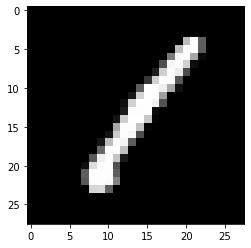

In [187]:
plt.imshow(np.reshape(train_images[0], (28,28)), cmap=plt.cm.gray);

In [188]:
train_labels[0]

1

In [172]:
###train_images = train_images.reshape((42000, 28 * 28))
###train_images = train_images.astype("float32") / 255



In [189]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
    
])

In [190]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [191]:
%%time
model.fit(train_images, 
          train_images, 
          epochs=5, 
          batch_size=128)

Epoch 1/5
329/329 [==============================] - 32s 95ms/step - loss: 0.3715 - accuracy: 0.8772
Epoch 2/5
329/329 [==============================] - 34s 102ms/step - loss: 0.0831 - accuracy: 0.9748
Epoch 3/5
329/329 [==============================] - 33s 99ms/step - loss: 0.0592 - accuracy: 0.9833
Epoch 4/5
329/329 [==============================] - 32s 98ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 5/5
329/329 [==============================] - 33s 101ms/step - loss: 0.0378 - accuracy: 0.9889
Wall time: 2min 43s


In [193]:

test_loss, test_acc = model.evaluate(train_images, train_labels)
print(f"test_acc: {test_acc}")

1313/1313 [==============================] - 12s 9ms/step - loss: 0.0190 - accuracy: 0.9941
test_acc: 0.9940714240074158


In [194]:
df=pd.read_csv('test.csv/test.csv') 

In [195]:
test_images=df

In [196]:
test_images=test_images.values.reshape(-1,28,28,1)

In [197]:
test_images=test_images/255.0

In [198]:
test_images.shape

(28000, 28, 28, 1)

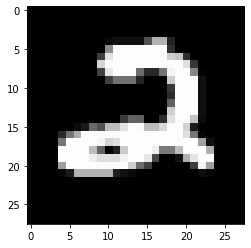

In [199]:
plt.imshow(np.reshape(test_images[0], (28,28)), cmap=plt.cm.gray);

In [200]:
###test_images = test_images.reshape((28000, 28 * 28))
###test_images = test_images.astype("float32") / 255

In [201]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print(f"test_acc: {test_acc}")

1313/1313 [==============================] - 12s 9ms/step - loss: 0.0190 - accuracy: 0.9941
test_acc: 0.9940714240074158


In [202]:
pred= model.predict(test_images)

In [203]:
prediction=[]
for i in range(len(pred)):
    prediction.append(np.argmax(pred[i]))


In [204]:
len(prediction)

28000

In [205]:
df_samp=pd.read_csv('sample_submission.csv')

In [206]:
df_samp

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [207]:
ids=[]
for i in range(1, 28001):
    ids.append(i)

In [208]:
len(prediction)

28000

In [209]:

mydf = pd.DataFrame(list(zip(ids, prediction)), columns = ['ImageId', 'Label'])
mydf

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [211]:
mydf.to_csv('lab-3-4_fin.csv', index=False)